In [83]:
import pandas as pd
import sklearn
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [84]:
datapath = "../Data/"
import os 
os.listdir(datapath)


dataset1 = pd.read_csv(datapath + "completeSpamAssassin.csv")
dataset2 = pd.read_csv(datapath + "lingSpam.csv")
dataset3 = pd.read_csv(datapath + "enronSpamSubset.csv")

print(f'The shape of first dataset is {dataset1.shape} \nThe shape of second dataset is {dataset2.shape} \nThe shape of third dataset is {dataset3.shape}')

The shape of first dataset is (6046, 3) 
The shape of second dataset is (2605, 3) 
The shape of third dataset is (10000, 4)


In [85]:
dataset1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [86]:
dataset2.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [87]:
dataset3.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [88]:
dataset1_1 = dataset1[['Body','Label']]
dataset2_1 = dataset2[['Body','Label']]
dataset3_1 = dataset3[['Body','Label']]

In [89]:
dataset1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [90]:
dataset2.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [91]:
dataset2.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [92]:
df = pd.concat([dataset1_1,dataset2_1,dataset3_1],ignore_index=True).rename(columns={'Body':'Email','Label':'Spam'})

In [93]:
df.shape

(18651, 2)

In [94]:
df.isnull().sum()

Email    1
Spam     0
dtype: int64

In [95]:
df.dropna(inplace=True)

In [96]:
df.shape

(18650, 2)

In [97]:
df.head()

,Email,Spam
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [98]:
df2=df

In [99]:
email_length = []

for email in df2['Email']:
    email_length.append(len(email))
    
df2['Email length'] = email_length

In [100]:
special_characters = []

for email in df2['Email']:
    special_characters_count = 0
    for character in email:
        if not character.isalnum():
            special_characters_count+=1
    special_characters.append(special_characters_count)
        
df2['Special characters'] = special_characters

In [101]:
digits = []

for email in df2['Email']:
    digits_counter = 0
    for character in email:
        if character.isdigit():
            digits_counter+=1
    digits.append(digits_counter)
            
            
df2['Digits'] = digits

In [102]:
def Search_word(word, File_location):
    with open(File_location, 'r') as fp:
        # read all lines in a list
        content= fp.read()
        for word in content:
            if word in content:
                return True
            else:
                return False

In [103]:
Spam_Triggered_Word_location = '../Data/Spam_Triggering_Words.csv'

trigger_words = []

for email in df2['Email']:
    trigger_words_counter = 0
    email = email.split()
    for word in email:
        if Search_word(word.lower(), Spam_Triggered_Word_location):
            trigger_words_counter+=1
    trigger_words.append(trigger_words_counter)
    
df2['Trigger words'] = trigger_words

In [104]:
df2.head()

,Email,Spam,Email length,Special characters,Digits,Trigger words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5,168
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51,76
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51,63
3,##############################################...,1,2863,1004,106,398
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34,67


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


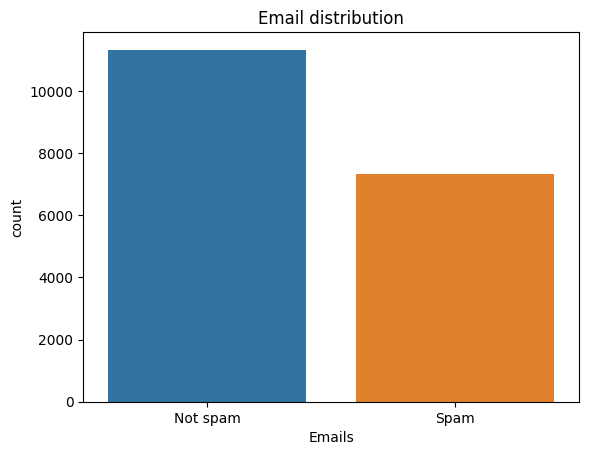

In [106]:
sns.countplot(x='Spam',data=df2)
plt.title('Email distribution')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [107]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df2['Email length'].describe()

count      18650
mean        2776
std       125173
min            1
25%          417
50%          896
75%         1905
max     17085626
Name: Email length, dtype: float64

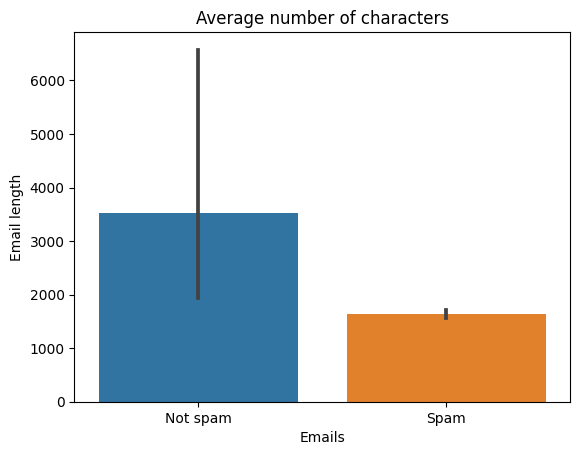

In [108]:
# Average number of characters

sns.barplot(x='Spam',y='Email length',data=df2)
plt.title('Average number of characters')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [109]:
df2['Special characters'].describe()

count     18650
mean        751
std       35010
min           0
25%         107
50%         242
75%         515
max     4779145
Name: Special characters, dtype: float64

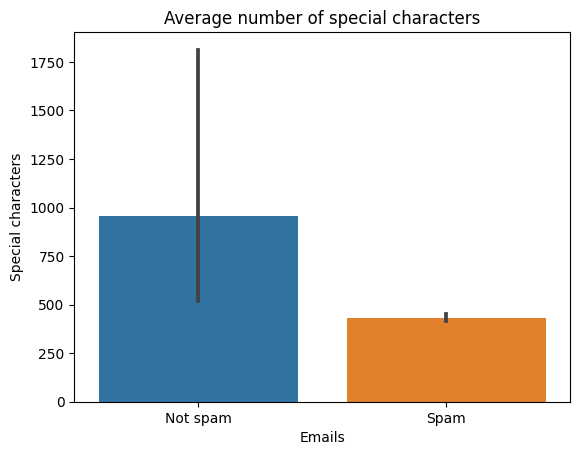

In [110]:
sns.barplot(x='Spam',y='Special characters',data=df2)
plt.title('Average number of special characters')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [111]:
df2['Digits'].describe()

count    18650
mean        62
std       2714
min          0
25%          4
50%         17
75%         41
max     369911
Name: Digits, dtype: float64

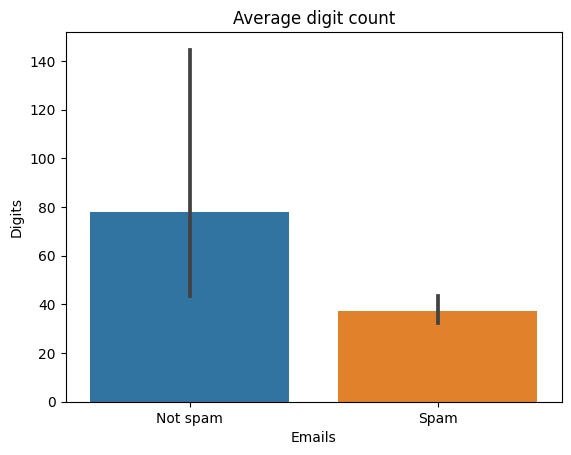

In [112]:
# Average digit count

sns.barplot(x='Spam',y='Digits',data=df2)
plt.title('Average digit count')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [113]:
df2['Trigger words'].describe()

count     18650
mean        535
std       25840
min           0
25%          75
50%         160
75%         355
max     3527577
Name: Trigger words, dtype: float64

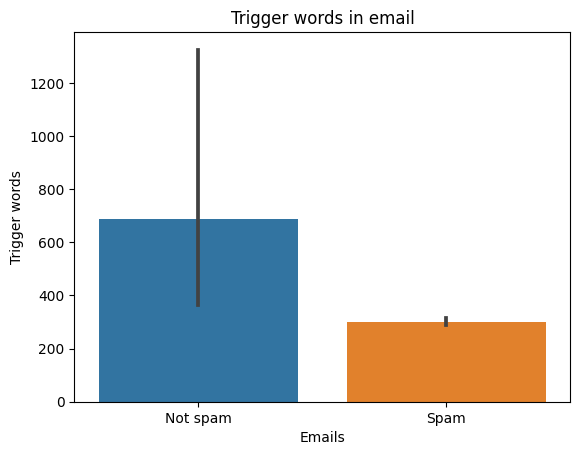

In [114]:
# Trigger words in emails

sns.barplot(x='Spam',y='Trigger words',data=df2)
plt.title('Trigger words in email')
plt.xticks([0,1],['Not spam','Spam'])
plt.xlabel('Emails')
plt.show()

In [115]:
# Importing essential libraries for data preprocessing and nlp
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/robin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/robin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
df2.head()

,Email,Spam,Email length,Special characters,Digits,Trigger words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5,168
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51,76
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51,63
3,##############################################...,1,2863,1004,106,398
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34,67


In [118]:
df3 = df2[(df2['Email length']<3200) & (df2['Email length']>15)]

In [119]:
df3.shape

(15666, 6)

In [125]:
# data cleaning

corpus = []
lemmatizer = WordNetLemmatizer()
for email in df3['Email']:

    removed_tab_newline = re.sub('[\n|\t]',' ', email)

    removed_Subject = re.sub('Subject:',' ', removed_tab_newline)
    
    removed_spchar_digits = re.sub('[^a-zA-Z]', ' ', removed_Subject)
    
    lower_case_email = removed_spchar_digits.lower()
    
    tokenized_email = lower_case_email.split()
    
    lemmatized_filtered_words = [lemmatizer.lemmatize(word) for word in tokenized_email if not word in stopwords.words('english')]
    
    email = ' '.join(lemmatized_filtered_words)
    corpus.append(email)

In [ ]:
# Creating vectors using TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df3['Spam']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [145]:
from sklearn.svm import LinearSVC
model_SVC = LinearSVC()
model_SVC.fit(X_train, y_train)
print('Model score on test data:',model_SVC.score(X_test,y_test))

Model score on test data: 0.9797872340425532


In [147]:
cross_val_score(model_SVC,X_test,y_test)

array([0.97340426, 0.97446809, 0.97765957, 0.97446809, 0.97021277])

In [146]:
# Confusion matrix and Classification Report

y_predicted = model_SVC.predict(X_test)

confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

array([[2775,   51],
       [  44, 1830]])

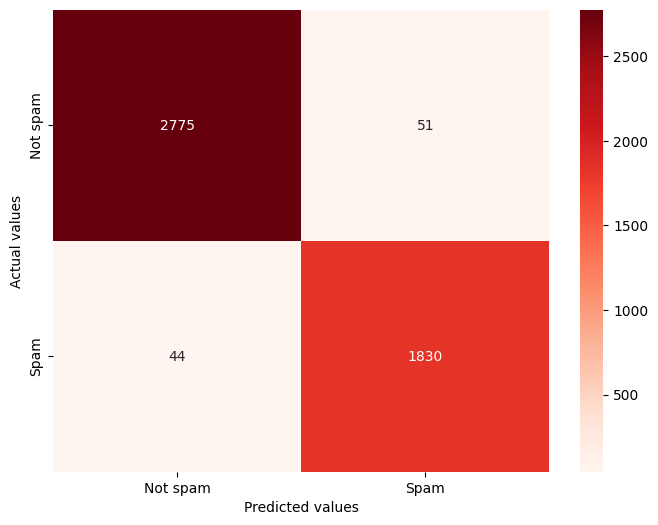

In [148]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [149]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2826
           1       0.97      0.98      0.97      1874

    accuracy                           0.98      4700
   macro avg       0.98      0.98      0.98      4700
weighted avg       0.98      0.98      0.98      4700

